# APSG tutorial - pandas

In [1]:
from apsg import *
import pandas as pd
from apsg.pandas import *

In [2]:
df = pd.read_csv('structures.csv')
df.head()

,site,structure,azi,inc
0,PB3,L3,113,47
1,PB3,L3,118,42
2,PB3,S1,42,79
3,PB3,S1,42,73
4,PB4,S0,195,10


In [3]:
g = df.groupby('structure')

In [4]:
l = g.get_group('L3').apsg.create_lins()
l.head()

,site,structure,azi,inc,lins
0,PB3,L3,113,47,L:113/47
1,PB3,L3,118,42,L:118/42
5,PB8,L3,167,17,L:167/17
6,PB9,L3,137,9,L:137/9
7,PB9,L3,147,14,L:147/14


In [5]:
l.lin.R()

L:122/8

In [6]:
f = g.get_group('S2').apsg.create_fols()
f.head()

,site,structure,azi,inc,fols
44,PS1,S2,228,70,S:228/70
45,PS1,S2,220,59,S:220/59
80,PS66,S2,45,47,S:45/47
95,MC1,S2,162,47,S:162/47
96,MC1,S2,174,77,S:174/77


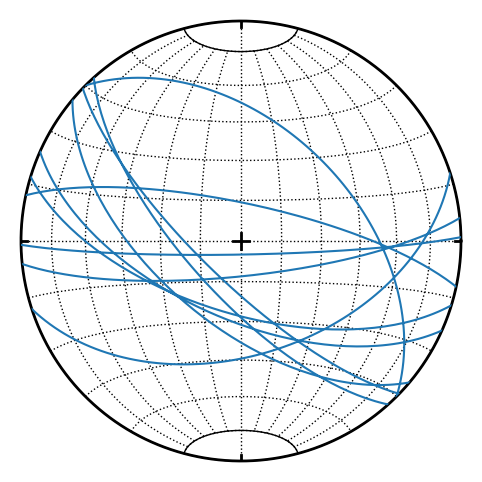

In [7]:
f.fol.great_circle()

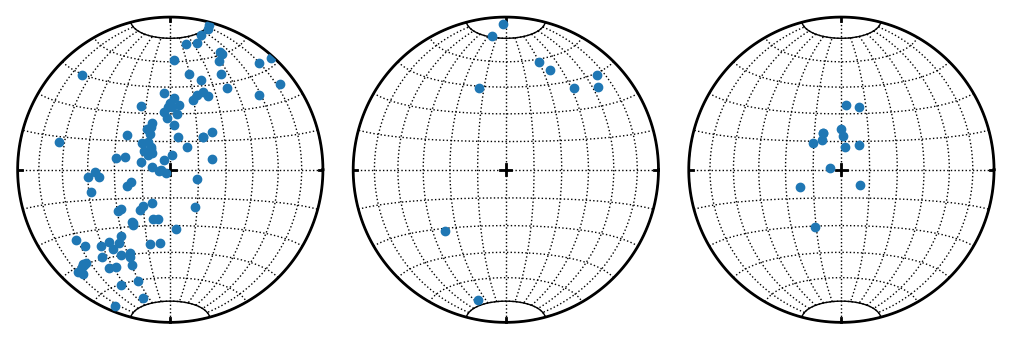

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(constrained_layout=True, figsize=(10, 4))
subfigs = fig.subfigures(1, 3)

# panel 1
s1 = StereoNet()
g.get_group('S1').apsg.create_fols().fol.pole(snet=s1)
# panel 2
s2 = StereoNet()
g.get_group('S2').apsg.create_fols().fol.pole(snet=s2)
# panel 3
s3 = StereoNet()
g.get_group('S3').apsg.create_fols().fol.pole(snet=s3)
# render2fig
s1.render2fig(subfigs[0])
s2.render2fig(subfigs[1])
s3.render2fig(subfigs[2])
plt.show()